Below based on `preprocess.ipynb` by Mohsen Bagherimehrab, at Zapata repository

In [1]:
import pandas as pd
import ehm_dmrg.ehm_utils as ehm_utils
import numpy as np
import time
import matplotlib.pyplot as plt

/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
#Preprocessing
rawdata = pd.read_csv('combined_df.csv', index_col=None)
[column for column in rawdata.columns]

['hamiltonian_id',
 'num_orbitals',
 'num_electrons',
 'num_spin_orbitals',
 'two_S',
 'orbsym',
 'isym',
 'total_num_states',
 'log10_hilbert_space_size',
 'tbt_matrices_calc_time_s',
 'bandwidth_calc_time_s',
 'coulomb_matrix_bandwidth_upper',
 'coulomb_matrix_bandwidth_lower',
 'exchange_matrix_bandwidth_upper',
 'exchange_matrix_bandwidth_lower',
 'mean_field_matrix_bandwidth_upper',
 'mean_field_matrix_bandwidth_lower',
 'coulomb_calc_time_s',
 'coulomb_matrix_algebraic_connectivity',
 'coulomb_matrix_transitivity',
 'coulomb_matrix_edgeCount',
 'coulomb_matrix_graph_creation_time',
 'coulomb_matrix_algebraic_connectivity_calc_time_s',
 'coulomb_matrix_transitivity_calc_time_s',
 'coulomb_matrix_specA_min',
 'coulomb_matrix_specA_Q2',
 'coulomb_matrix_specA_max',
 'coulomb_matrix_specA_mean',
 'coulomb_matrix_specA_std',
 'coulomb_matrix_specA_coeff_variation',
 'coulomb_matrix_specA_power_spectral_entropy',
 'coulomb_matrix_specA_calc_time_s',
 'coulomb_matrix_specA_stat_calc_tim

In [3]:
# Before applying the preprocessing, we now reduced the raw dataset for one solver.
rawdata_coarse_bd = rawdata.drop(['total_loops_cpu_time_sec'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['total_loops_wall_time_sec'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['hamiltonian_id'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['orbsym'], axis=1)
rawdata_coarse_bd

,num_orbitals,num_electrons,num_spin_orbitals,two_S,isym,total_num_states,log10_hilbert_space_size,tbt_matrices_calc_time_s,bandwidth_calc_time_s,coulomb_matrix_bandwidth_upper,...,tbt_std,tbt_max,tbt_min,tbt_coeff_variation,tbt_inv_coeff_variation,tbt_calc_time_s,coarse_bond_dimension,hubbard_dist_obt,hubbard_dist_tbt,hubbard_dist_total
0,16,18,32,0,1,4.714356e+08,8.673422,0.000059,0.008314,15,...,0.050905,0.181477,-1.284096,-18.419254,-0.054291,0.000355,5,32.758510,7.143057,39.901567
1,39,50,78,0,1,1.221223e+21,21.086795,0.000101,0.000027,38,...,0.009383,0.155296,-0.646134,-49.561248,-0.020177,0.008852,15,47.864947,11.982410,59.847357
2,6,8,12,0,1,4.950000e+02,2.694605,0.000030,0.000022,5,...,0.119174,0.248385,-0.999534,-7.737953,-0.129233,0.000078,5,3.208108,3.205532,6.413640
3,28,34,56,0,1,2.142582e+15,15.330938,0.000076,0.002178,27,...,0.016504,0.354616,-0.866718,-35.055834,-0.028526,0.001933,27,34.619034,10.013960,44.632995
4,25,30,50,0,1,4.712921e+13,13.673290,0.000150,0.000049,24,...,0.020110,0.185788,-0.959582,-30.234279,-0.033075,0.001935,8,33.717343,9.154110,42.871453
5,9,12,18,0,1,1.856400e+04,4.268672,0.000033,0.000026,8,...,0.068235,0.148887,-0.935118,-15.234374,-0.065641,0.000079,9,4.787133,4.940672,9.727805
6,14,22,28,0,1,3.767400e+05,5.576042,0.000037,0.000023,13,...,0.033346,0.144921,-0.710899,-17.589257,-0.056853,0.000144,7,6.188559,6.068211,12.256771
7,33,46,66,0,1,4.066117e+16,16.609180,0.000129,0.000069,32,...,0.008872,0.267286,-0.419490,-48.890471,-0.020454,0.004729,104,9.130759,9.658128,18.788887
8,46,58,92,0,1,1.792375e+25,25.253429,0.000148,0.000029,45,...,0.006246,0.196475,-0.318972,-59.572611,-0.016786,0.452869,8,16.227531,13.523279,29.750810
9,33,45,66,1,1,8.906733e+16,16.949718,0.000099,0.000029,32,...,0.009116,0.267021,-0.459342,-43.897176,-0.022781,0.004100,449,9.096472,9.731713,18.828185


In [4]:
# temp_df = rawdata_coarse_bd#.drop(["log10_hilbert_space_size"], axis=1)
# temp_df = temp_df.drop(["coarse_bond_dimension"], axis=1)
# #divide all  columns with log10_hilbert_space_size
# temp_df = temp_df.div(rawdata_coarse_bd["log10_hilbert_space_size"], axis=0)
# temp_df = temp_df.drop(["log10_hilbert_space_size"], axis=1)
# # Add back the log10_hilbert_space_size and coarse_bond_dimension
# temp_df["log10_hilbert_space_size"] = rawdata_coarse_bd["log10_hilbert_space_size"]
# temp_df["coarse_bond_dimension"] = rawdata_coarse_bd["coarse_bond_dimension"]
# rawdata_coarse_bd_hspace_normalized = temp_df
# # rawdata_coarse_bd_hspace_normalized

In [5]:
# We now apply the preprocessing

target = 'coarse_bond_dimension'

rawdata_coarse_bd[target] = np.log10(rawdata_coarse_bd[target])

preproc_df_coarse_bd = ehm_utils.preprocess(rawdata_coarse_bd, target, normalize_target=True)
# preproc_df_coarse_bd, compenents, singular_values, feature_names = ehm_utils.preprocess(rawdata_coarse_bd_hspace_normalized, target, normalize_target=True,pca_decorrelation=True)
preproc_df_coarse_bd

,num_orbitals,num_electrons,num_spin_orbitals,two_S,total_num_states,log10_hilbert_space_size,tbt_matrices_calc_time_s,bandwidth_calc_time_s,coulomb_matrix_bandwidth_upper,coulomb_calc_time_s,...,tbt_mean,tbt_std,tbt_max,tbt_coeff_variation,tbt_inv_coeff_variation,tbt_calc_time_s,hubbard_dist_obt,hubbard_dist_tbt,hubbard_dist_total,coarse_bond_dimension
0,-1.088973,-1.292059,-1.088973,-0.326161,-0.176452,-0.855867,-0.718482,6.635335,-1.088973,-0.251257,...,-0.005676,0.365448,-0.568663,1.112266,-0.533687,-0.591239,-0.125094,-0.801539,-0.221174,-1.150156
1,0.458660,0.184580,0.458660,-0.326161,-0.176452,0.728556,0.009041,-0.177195,0.458660,-0.218734,...,0.371187,-0.472584,-0.637978,-0.337797,0.493539,-0.562654,0.438815,0.457345,0.464653,-0.367566
2,-1.761857,-1.753509,-1.761857,-0.326161,-0.176452,-1.618994,-1.215695,-0.181127,-1.761857,-0.265662,...,-1.855674,1.743291,-0.391525,1.609618,-2.790313,-0.592169,-1.228183,-1.825827,-1.372643,-1.150156
3,-0.281513,-0.553740,-0.281513,-0.326161,-0.176452,-0.006112,-0.430184,1.590654,-0.281513,-0.242200,...,0.329981,-0.328858,-0.110282,0.337618,0.242141,-0.585929,-0.055643,-0.054717,-0.058486,0.051140
4,-0.483378,-0.738320,-0.483378,-0.326161,-0.176452,-0.217692,0.852315,-0.158715,-0.483378,-0.245618,...,0.301533,-0.256088,-0.557251,0.562124,0.105160,-0.585923,-0.089302,-0.278394,-0.119056,-0.815352
5,-1.559992,-1.568929,-1.559992,-0.326161,-0.176452,-1.418082,-1.171088,-0.178050,-1.559992,-0.262169,...,-0.256776,0.715199,-0.654945,1.260563,-0.875454,-0.592167,-1.169240,-1.374456,-1.258687,-0.731450
6,-1.223550,-1.107479,-1.223550,-0.326161,-0.176452,-1.251212,-1.101099,-0.180445,-1.223550,-0.252089,...,0.121372,0.011056,-0.665445,1.150913,-0.610829,-0.591947,-1.116926,-1.081144,-1.171729,-0.910472
7,0.054929,0.000000,0.054929,-0.326161,-0.176452,0.157040,0.483010,-0.142778,0.054929,0.878780,...,0.372339,-0.482909,-0.341486,-0.306563,0.485203,-0.576524,-1.007096,-0.147281,-0.947125,1.011774
8,0.929678,0.553740,0.929678,-0.326161,-0.174433,1.260378,0.806743,-0.175280,0.929678,6.622457,...,0.383555,-0.535909,-0.528956,-0.803955,0.595642,0.930941,-0.742180,0.858179,-0.570204,-0.815352
9,0.054929,-0.046145,0.054929,1.005663,-0.176452,0.200506,-0.032997,-0.175389,0.054929,-0.049044,...,0.368504,-0.477986,-0.342188,-0.074061,0.415145,-0.578641,-1.008376,-0.128140,-0.945774,2.053670


In [6]:
# # Decorrelate data with eigendecomposition of correlation matrix
# #Store target
# target = preproc_df_coarse_bd['coarse_bond_dimension']
# #Drop target from dataframe
# preproc_df_coarse_bd = preproc_df_coarse_bd.drop(['coarse_bond_dimension'], axis=1)
# #Compute correlation matrix
# correlation_df = preproc_df_coarse_bd.corr()
# #Compute eigenvalues and eigenvectors
# eigenvalues, eigenvectors = np.linalg.eigh(correlation_df)
# #Sort eigenvalues
# sorted_indices = np.argsort(eigenvalues)[::-1]
# sorted_eigenvalues = eigenvalues[sorted_indices]
# sorted_eigenvectors = eigenvectors[:, sorted_indices]
# #Decorrelate data
# decorrelated_data = np.dot(preproc_df_coarse_bd, sorted_eigenvectors)
# #Make dataframe
# decorrelated_df = pd.DataFrame(decorrelated_data)
# #Add target back
# decorrelated_df['coarse_bond_dimension'] = target

In [7]:
# decorrelated_df

In [8]:
# decorrelated_df.corr()

In [9]:
# # print full U matrix  without summary
# np.set_printoptions(threshold=np.inf)

# for row in np.log10(np.abs(U)).T:
#     print(np.max(row), np.argmax(row))
#     print(np.min(row), np.argmin(row))

In [10]:
# #Plot singular values
# plt.plot(s)
# plt.xlabel('Singular value index')
# plt.ylabel('Singular value')
# plt.title('Singular values of correlation matrix')
# # y axislog 
# plt.yscale('log')
# plt.show()

In [11]:
# [column for column in preproc_df_coarse_bd.columns]
# print(len(preproc_df_coarse_bd.columns))

In [12]:
# features_to_keep =[
# ##Positive correlation for below
# ###
# "log10_hilbert_space_size", # PCC 0.287628 with coarse_bond_dimension
# "num_orbitals", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_bandwidth_upper", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_algebraic_connectivity",
# "coulomb_matrix_edgeCount", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_specA_max",
# "coulomb_matrix_specA_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "exchange_matrix_specA_power_spectral_entropy", # PCC 0.395203 with coarse_bond_dimension  ##################################################
# "exchange_matrix_specR_min",
# "exchange_matrix_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "mean_field_calc_time_s",
# "mean_field_matrix_algebraic_connectivity", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_algebraic_connectivity_calc_time_s",
# "mean_field_matrix_specA_max",
# "mean_field_matrix_specA_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "mean_field_matrix_specL_std", #Important for DT?
# "mean_field_matrix_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_graph_mapping_calc_time_s", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_calc_time_s",
# "tbt_abs_graph_mapping_algebraic_connectivity", # Very unique, split correlation, strong
# "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",
# "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",
# "tbt_abs_graph_mapping_specA_min",
# "tbt_abs_graph_mapping_specA_Q2", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "tbt_abs_graph_mapping_specA_max", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_specA_mean", # Unique, some correlation splitting # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "tbt_abs_graph_mapping_specA_std", # PCC 0.352337 with coarse_bond_dimension # Absolute Pearson CC with tbt_abs_graph_mapping_algebraic_connectivity > 0.8 ###########################
# "tbt_abs_graph_mapping_specA_coeff_variation",
# "tbt_abs_graph_mapping_specA_power_spectral_entropy", # PCC 0.295939 with coarse_bond_dimension
# "tbt_abs_graph_mapping_specL_max", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_specL_std", # PCC 0.323950 with coarse_bond_dimension
# "tbt_abs_graph_mapping_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "density_hopping_tensor_min", # PCC 0.288345 with coarse_bond_dimension
# "density_hopping_tensor_sum_abs", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# ## Negative correlation for below
# ###
# "coulomb_matrix_specL_min", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "coulomb_matrix_specL_Q2", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "coulomb_matrix_specL_mean", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "coulomb_matrix_specR_min", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "exchange_matrix_specL_coeff_variation", # PCC -0.335911 with coarse_bond_dimension
# "exchange_matrix_specL_power_spectral_entropy", # PCC -0.263279 with coarse_bond_dimension
# "exchange_matrix_specR_max", #Important for DT?
# "exchange_matrix_specR_std",
# "mean_field_matrix_specA_min", #Important for DT?  # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specL_min", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specL_Q2", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specL_mean", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specR_min", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_specL_coeff_variation",
# "tbt_abs_graph_mapping_specL_power_spectral_entropy",
# "tbt_abs_graph_mapping_specR_max", # PCC -0.258219 with coarse_bond_dimension
# "tbt_abs_graph_mapping_specR_coeff_variation", # PCC -0.395208 with coarse_bond_dimension ####################
# "density_hopping_tensor_coeff_variation", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_coeff_variation", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
    
# ]
# features_to_keep =[
# # "num_orbitals",#log10_hilbert_space_size                                                 8
# # "num_electrons",#log10_hilbert_space_size                                                6
# # "num_spin_orbitals",#log10_hilbert_space_size                                            8
# # "two_S",#                                                        0
# # "total_num_states",#log10_hilbert_space_size                                             1
# # "log10_hilbert_space_size",#                                     1
# # "tbt_matrices_calc_time_s",#log10_hilbert_space_size                                     0
# # "bandwidth_calc_time_s",#                                        0
# # "coulomb_matrix_bandwidth_upper",#log10_hilbert_space_size                               8
# # "coulomb_calc_time_s",#                                          0
# # "coulomb_matrix_algebraic_connectivity",#                        0
# # "coulomb_matrix_edgeCount",#log10_hilbert_space_size                                     0
# # "coulomb_matrix_graph_creation_time",#log10_hilbert_space_size                           1
# # "coulomb_matrix_algebraic_connectivity_calc_time_s",#            0
# # "coulomb_matrix_transitivity_calc_time_s",#log10_hilbert_space_size                      0
# # "coulomb_matrix_specA_min",#                                     0
# # "coulomb_matrix_specA_Q2",#                                      0
# # "coulomb_matrix_specA_max",#                                     0
# # "coulomb_matrix_specA_mean",#                                    0
# # "coulomb_matrix_specA_std",#                                     0
# # "coulomb_matrix_specA_coeff_variation",#                         0
# # "coulomb_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size                  6
# # "coulomb_matrix_specA_calc_time_s",#                             0
# # "coulomb_matrix_specA_stat_calc_time_s",#                        0
# # "coulomb_matrix_specL_min",#                                     0
# # "coulomb_matrix_specL_Q2",#                                      0
# # "coulomb_matrix_specL_max",#                                     0
# # "coulomb_matrix_specL_mean",#                                    0
# # "coulomb_matrix_specL_std",#                                     0
# # "coulomb_matrix_specL_coeff_variation",#                         0
# # "coulomb_matrix_specL_power_spectral_entropy",#                  0
# # "coulomb_matrix_specL_calc_time_s",#                             0
# # "coulomb_matrix_specL_stat_calc_time_s",#                        0
# # "coulomb_matrix_specR_min",#log10_hilbert_space_size                                    23
# # "coulomb_matrix_specR_Q2",#                                      0
# # "coulomb_matrix_specR_max",#                                     0
# # "coulomb_matrix_specR_mean",#                                    0
# # "coulomb_matrix_specR_std",#                                     0
# # "coulomb_matrix_specR_coeff_variation",#                         0
# # "coulomb_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size                  6
# # "coulomb_matrix_specR_calc_time_s",#                             0
# # "coulomb_matrix_specR_stat_calc_time_s",#                        0
# # "exchange_calc_time_s",#log10_hilbert_space_size                                         0
# # "exchange_matrix_algebraic_connectivity",#                       0
# # "exchange_matrix_graph_creation_time",#                          0
# # "exchange_matrix_algebraic_connectivity_calc_time_s",#           0
# # "exchange_matrix_transitivity_calc_time_s",#                     0
# # "exchange_matrix_specA_min",#                                    0
# # "exchange_matrix_specA_Q2",#                                     0
# # "exchange_matrix_specA_max",#                                    0
# # "exchange_matrix_specA_mean",#                                   0
# # "exchange_matrix_specA_std",#                                    0
# # "exchange_matrix_specA_coeff_variation",#                        0
# # "exchange_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size                 1
# # "exchange_matrix_specA_calc_time_s",#                            0
# # "exchange_matrix_specA_stat_calc_time_s",#                       0
# # "exchange_matrix_specL_min",#                                    0
# # "exchange_matrix_specL_Q2",#                                     0
# # "exchange_matrix_specL_max",#                                    0
# # "exchange_matrix_specL_mean",#                                   0
# # "exchange_matrix_specL_std",#                                    0
# # "exchange_matrix_specL_coeff_variation",#                        0
# # "exchange_matrix_specL_power_spectral_entropy",#                 0
# # "exchange_matrix_specL_calc_time_s",#                            0
# # "exchange_matrix_specL_stat_calc_time_s",#                       0
# # "exchange_matrix_specR_min",#                                    0
# # "exchange_matrix_specR_Q2",#                                     0
# # "exchange_matrix_specR_max",#                                    0
# # "exchange_matrix_specR_mean",#                                   0
# # "exchange_matrix_specR_std",#                                    0
# # "exchange_matrix_specR_coeff_variation",#                        0
# # "exchange_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size                 6
# # "exchange_matrix_specR_calc_time_s",#                            0
# # "exchange_matrix_specR_stat_calc_time_s",#                       0
# # "mean_field_calc_time_s",#                                       0
# # "mean_field_matrix_algebraic_connectivity",#                     0
# # "mean_field_matrix_graph_creation_time",#                        0
# # "mean_field_matrix_algebraic_connectivity_calc_time_s",#         0
# # "mean_field_matrix_transitivity_calc_time_s",#log10_hilbert_space_size                   0
# # "mean_field_matrix_specA_min",#                                  0
# # "mean_field_matrix_specA_Q2",#                                   0
# # "mean_field_matrix_specA_max",#                                  0
# # "mean_field_matrix_specA_mean",#                                 0
# # "mean_field_matrix_specA_std",#                                  0
# # "mean_field_matrix_specA_coeff_variation",#                      0
# # "mean_field_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size               6
# # "mean_field_matrix_specA_calc_time_s",#log10_hilbert_space_size                          0
# # "mean_field_matrix_specA_stat_calc_time_s",#                     0
# # "mean_field_matrix_specL_min",#                                  0
# # "mean_field_matrix_specL_Q2",#                                   0
# # "mean_field_matrix_specL_max",#                                  0
# # "mean_field_matrix_specL_mean",#                                 0
# # "mean_field_matrix_specL_std",#                                  0
# # "mean_field_matrix_specL_coeff_variation",#                      0
# "mean_field_matrix_specL_power_spectral_entropy",#               0
# # "mean_field_matrix_specL_calc_time_s",#                          0
# # "mean_field_matrix_specL_stat_calc_time_s",#                     0
# # "mean_field_matrix_specR_min",#log10_hilbert_space_size                                 22
# # "mean_field_matrix_specR_Q2",#                                   0
# # "mean_field_matrix_specR_max",#                                  0
# # "mean_field_matrix_specR_mean",#                                 0
# # "mean_field_matrix_specR_std",#                                  0
# # "mean_field_matrix_specR_coeff_variation",#                      0
# # "mean_field_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size               6
# # "mean_field_matrix_specR_calc_time_s",#                          0
# # "mean_field_matrix_specR_stat_calc_time_s",#                     0
# # "tbt_graph_mapping_calc_time_s",#log10_hilbert_space_size                                0
# # "tbt_abs_graph_mapping_calc_time_s",#                            0
# # "tbt_abs_graph_mapping_algebraic_connectivity",#                 0
# # "tbt_abs_graph_mapping_graph_creation_time",#log10_hilbert_space_size                    0
# # "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",#     0
# # "tbt_abs_graph_mapping_transitivity_calc_time_s",#               0
# # "tbt_abs_graph_mapping_specA_min",#                              0
# # "tbt_abs_graph_mapping_specA_Q2",#                               0
# # "tbt_abs_graph_mapping_specA_max",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specA_mean",#                             0
# # "tbt_abs_graph_mapping_specA_std",#                              0
# # "tbt_abs_graph_mapping_specA_coeff_variation",#                  0
# "tbt_abs_graph_mapping_specA_power_spectral_entropy",#           0
# # "tbt_abs_graph_mapping_specA_calc_time_s",#log10_hilbert_space_size                      0
# # "tbt_abs_graph_mapping_specA_stat_calc_time_s",#                 0
# # "tbt_abs_graph_mapping_specL_min",#                              0
# # "tbt_abs_graph_mapping_specL_Q2",#log10_hilbert_space_size                               0
# "tbt_abs_graph_mapping_specL_max",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specL_mean",#log10_hilbert_space_size                             0
# # "tbt_abs_graph_mapping_specL_std",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specL_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specL_power_spectral_entropy",#           0
# # "tbt_abs_graph_mapping_specL_calc_time_s",#log10_hilbert_space_size                      0
# # "tbt_abs_graph_mapping_specL_stat_calc_time_s",#                 0
# # "tbt_abs_graph_mapping_specR_min",#                              0
# # "tbt_abs_graph_mapping_specR_Q2",#                               0
# # "tbt_abs_graph_mapping_specR_max",#                              0
# # "tbt_abs_graph_mapping_specR_mean",#                             0
# # "tbt_abs_graph_mapping_specR_std",#                              0
# # "tbt_abs_graph_mapping_specR_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specR_power_spectral_entropy",#log10_hilbert_space_size           6
# # "tbt_abs_graph_mapping_specR_calc_time_s",#                      0
# # "tbt_abs_graph_mapping_specR_stat_calc_time_s",#                 0
# # "one_body_tensor_calc_time_s",#                                  0
# # "one_body_tensor_bandwidth_upper",#log10_hilbert_space_size                              7
# # "one_body_tensor_bandwidth_lower",#log10_hilbert_space_size                              8
# # "density_hopping_tensor_mean",#                                  0
# # "density_hopping_tensor_std",#                                   0
# # "density_hopping_tensor_max",#                                   0
# "density_hopping_tensor_min",#                                   0
# # "density_hopping_tensor_coeff_variation",#log10_hilbert_space_size                       0
# # "density_hopping_tensor_inv_coeff_variation",#log10_hilbert_space_size                   0
# # "density_hopping_tensor_sum_abs",# log10_hilbert_space_size                              0
# # "tbt_density_hopping_calc_time_s",#                              0
# # "tbt_mean",#                                                     0
# # "tbt_std",#                                                      0
# # "tbt_max",#                                                      0
# # "tbt_coeff_variation",#log10_hilbert_space_size                                         12
# # "tbt_inv_coeff_variation",#                                      0
# # "tbt_calc_time_s",#                                              0
# "coarse_bond_dimension",#                                       20
# ]
# features_to_keep =[
# 132, #                     0.464184
# 75,  #                     0.447602
# 129, #                     0.403590
# 105, #                     0.400790
# 155, #                     0.360431
# 0,   #                     0.356010
# 71,  #                     0.345408
# 55,  #                     0.344435
# 144, #                     0.332154
# 48,  #                     0.326521
# 59,  #                     0.325584
# 86,  #                     0.313738
# 96,  #                     0.306352
# "121", #                     0.301793
# "coarse_bond_dimension",#                                       20
# ]
# features_to_keep =[ #non-log DT topfeatures
# # "num_orbitals",#log10_hilbert_space_size                                                 8
# # "num_electrons",#log10_hilbert_space_size                                                6
# # "num_spin_orbitals",#log10_hilbert_space_size                                            8
# # "two_S",#                                                        0
# # "total_num_states",#log10_hilbert_space_size                                             1
# # "log10_hilbert_space_size",#                                     1
# # "tbt_matrices_calc_time_s",#log10_hilbert_space_size                                     0
# # "bandwidth_calc_time_s",#                                        0
# # "coulomb_matrix_bandwidth_upper",#log10_hilbert_space_size                               8
# # "coulomb_calc_time_s",#                                          0
# # "coulomb_matrix_algebraic_connectivity",#                        0
# # "coulomb_matrix_edgeCount",#log10_hilbert_space_size                                     0
# # "coulomb_matrix_graph_creation_time",#log10_hilbert_space_size                           1
# # "coulomb_matrix_algebraic_connectivity_calc_time_s",#            0
# # "coulomb_matrix_transitivity_calc_time_s",#log10_hilbert_space_size                      0
# # "coulomb_matrix_specA_min",#                                     0
# # "coulomb_matrix_specA_Q2",#                                      0
# # "coulomb_matrix_specA_max",#                                     0
# # "coulomb_matrix_specA_mean",#                                    0
# # "coulomb_matrix_specA_std",#                                     0
# # "coulomb_matrix_specA_coeff_variation",#                         0
# # "coulomb_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size                  6
# # "coulomb_matrix_specA_calc_time_s",#                             0
# # "coulomb_matrix_specA_stat_calc_time_s",#                        0
# # "coulomb_matrix_specL_min",#                                     0
# # "coulomb_matrix_specL_Q2",#                                      0
# # "coulomb_matrix_specL_max",#                                     0
# # "coulomb_matrix_specL_mean",#                                    0
# # "coulomb_matrix_specL_std",#                                     0
# # "coulomb_matrix_specL_coeff_variation",#                         0
# # "coulomb_matrix_specL_power_spectral_entropy",#                  0
# # "coulomb_matrix_specL_calc_time_s",#                             0
# # "coulomb_matrix_specL_stat_calc_time_s",#                        0
# # "coulomb_matrix_specR_min",#log10_hilbert_space_size                                    23
# # "coulomb_matrix_specR_Q2",#                                      0
# # "coulomb_matrix_specR_max",#                                     0
# # "coulomb_matrix_specR_mean",#                                    0
# # "coulomb_matrix_specR_std",#                                     0
# # "coulomb_matrix_specR_coeff_variation",#                         0
# # "coulomb_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size                  6
# # "coulomb_matrix_specR_calc_time_s",#                             0
# # "coulomb_matrix_specR_stat_calc_time_s",#                        0
# # "exchange_calc_time_s",#log10_hilbert_space_size                                         0
# # "exchange_matrix_algebraic_connectivity",#                       0
# # "exchange_matrix_graph_creation_time",#                          0
# # "exchange_matrix_algebraic_connectivity_calc_time_s",#           0
# # "exchange_matrix_transitivity_calc_time_s",#                     0
# # "exchange_matrix_specA_min",#                                    0
# # "exchange_matrix_specA_Q2",#                                     0
# # "exchange_matrix_specA_max",#                                    0
# # "exchange_matrix_specA_mean",#                                   0
# # "exchange_matrix_specA_std",#                                    0
# # "exchange_matrix_specA_coeff_variation",#                        0
# # "exchange_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size                 1
# # "exchange_matrix_specA_calc_time_s",#                            0
# # "exchange_matrix_specA_stat_calc_time_s",#                       0
# "exchange_matrix_specL_min",#                                    0
# # "exchange_matrix_specL_Q2",#                                     0
# # "exchange_matrix_specL_max",#                                    0
# # "exchange_matrix_specL_mean",#                                   0
# # "exchange_matrix_specL_std",#                                    0
# # "exchange_matrix_specL_coeff_variation",#                        0
# # "exchange_matrix_specL_power_spectral_entropy",#                 0
# # "exchange_matrix_specL_calc_time_s",#                            0
# # "exchange_matrix_specL_stat_calc_time_s",#                       0
# # "exchange_matrix_specR_min",#                                    0
# # "exchange_matrix_specR_Q2",#                                     0
# # "exchange_matrix_specR_max",#                                    0
# # "exchange_matrix_specR_mean",#                                   0
# # "exchange_matrix_specR_std",#                                    0
# "exchange_matrix_specR_coeff_variation",#                        0
# # "exchange_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size                 6
# # "exchange_matrix_specR_calc_time_s",#                            0
# # "exchange_matrix_specR_stat_calc_time_s",#                       0
# # "mean_field_calc_time_s",#                                       0
# # "mean_field_matrix_algebraic_connectivity",#                     0
# # "mean_field_matrix_graph_creation_time",#                        0
# # "mean_field_matrix_algebraic_connectivity_calc_time_s",#         0
# # "mean_field_matrix_transitivity_calc_time_s",#log10_hilbert_space_size                   0
# "mean_field_matrix_specA_min",#                                  0
# # "mean_field_matrix_specA_Q2",#                                   0
# # "mean_field_matrix_specA_max",#                                  0
# # "mean_field_matrix_specA_mean",#                                 0
# # "mean_field_matrix_specA_std",#                                  0
# # "mean_field_matrix_specA_coeff_variation",#                      0
# # "mean_field_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size               6
# # "mean_field_matrix_specA_calc_time_s",#log10_hilbert_space_size                          0
# # "mean_field_matrix_specA_stat_calc_time_s",#                     0
# # "mean_field_matrix_specL_min",#                                  0
# # "mean_field_matrix_specL_Q2",#                                   0
# # "mean_field_matrix_specL_max",#                                  0
# # "mean_field_matrix_specL_mean",#                                 0
# # "mean_field_matrix_specL_std",#                                  0
# # "mean_field_matrix_specL_coeff_variation",#                      0
# "mean_field_matrix_specL_power_spectral_entropy",#               0
# # "mean_field_matrix_specL_calc_time_s",#                          0
# # "mean_field_matrix_specL_stat_calc_time_s",#                     0
# # "mean_field_matrix_specR_min",#log10_hilbert_space_size                                 22
# # "mean_field_matrix_specR_Q2",#                                   0
# # "mean_field_matrix_specR_max",#                                  0
# # "mean_field_matrix_specR_mean",#                                 0
# # "mean_field_matrix_specR_std",#                                  0
# # "mean_field_matrix_specR_coeff_variation",#                      0
# # "mean_field_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size               6
# # "mean_field_matrix_specR_calc_time_s",#                          0
# # "mean_field_matrix_specR_stat_calc_time_s",#                     0
# # "tbt_graph_mapping_calc_time_s",#log10_hilbert_space_size                                0
# # "tbt_abs_graph_mapping_calc_time_s",#                            0
# # "tbt_abs_graph_mapping_algebraic_connectivity",#                 0
# # "tbt_abs_graph_mapping_graph_creation_time",#log10_hilbert_space_size                    0
# # "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",#     0
# # "tbt_abs_graph_mapping_transitivity_calc_time_s",#               0
# # "tbt_abs_graph_mapping_specA_min",#                              0
# # "tbt_abs_graph_mapping_specA_Q2",#                               0
# # "tbt_abs_graph_mapping_specA_max",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specA_mean",#                             0
# # "tbt_abs_graph_mapping_specA_std",#                              0
# # "tbt_abs_graph_mapping_specA_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specA_power_spectral_entropy",#           0
# # "tbt_abs_graph_mapping_specA_calc_time_s",#log10_hilbert_space_size                      0
# # "tbt_abs_graph_mapping_specA_stat_calc_time_s",#                 0
# # "tbt_abs_graph_mapping_specL_min",#                              0
# # "tbt_abs_graph_mapping_specL_Q2",#log10_hilbert_space_size                               0
# # "tbt_abs_graph_mapping_specL_max",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specL_mean",#log10_hilbert_space_size                             0
# # "tbt_abs_graph_mapping_specL_std",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specL_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specL_power_spectral_entropy",#           0
# # "tbt_abs_graph_mapping_specL_calc_time_s",#log10_hilbert_space_size                      0
# # "tbt_abs_graph_mapping_specL_stat_calc_time_s",#                 0
# # "tbt_abs_graph_mapping_specR_min",#                              0
# # "tbt_abs_graph_mapping_specR_Q2",#                               0
# # "tbt_abs_graph_mapping_specR_max",#                              0
# # "tbt_abs_graph_mapping_specR_mean",#                             0
# # "tbt_abs_graph_mapping_specR_std",#                              0
# "tbt_abs_graph_mapping_specR_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specR_power_spectral_entropy",#log10_hilbert_space_size           6
# # "tbt_abs_graph_mapping_specR_calc_time_s",#                      0
# # "tbt_abs_graph_mapping_specR_stat_calc_time_s",#                 0
# # "one_body_tensor_calc_time_s",#                                  0
# # "one_body_tensor_bandwidth_upper",#log10_hilbert_space_size                              7
# # "one_body_tensor_bandwidth_lower",#log10_hilbert_space_size                              8
# # "density_hopping_tensor_mean",#                                  0
# "density_hopping_tensor_std",#                                   0
# # "density_hopping_tensor_max",#                                   0
# "density_hopping_tensor_min",#                                   0
# # "density_hopping_tensor_coeff_variation",#log10_hilbert_space_size                       0
# # "density_hopping_tensor_inv_coeff_variation",#log10_hilbert_space_size                   0
# # "density_hopping_tensor_sum_abs",# log10_hilbert_space_size                              0
# # "tbt_density_hopping_calc_time_s",#                              0
# # "tbt_mean",#                                                     0
# # "tbt_std",#                                                      0
# # "tbt_max",#                                                      0
# # "tbt_coeff_variation",#log10_hilbert_space_size                                         12
# # "tbt_inv_coeff_variation",#                                      0
# # "tbt_calc_time_s",#                                              0
# "coarse_bond_dimension",#                                       20
# ]
# features_to_keep =[ # WHAT WAS SHOWN AT TUES MEETING
# # "num_orbitals",#log10_hilbert_space_size                                                 8
# # "num_electrons",#log10_hilbert_space_size                                                6
# # "num_spin_orbitals",#log10_hilbert_space_size                                            8
# # "two_S",#                                                        0
# # "total_num_states",#log10_hilbert_space_size                                             1
# # "log10_hilbert_space_size",#                                     1
# # "tbt_matrices_calc_time_s",#log10_hilbert_space_size                                     0
# # "bandwidth_calc_time_s",#                                        0
# # "coulomb_matrix_bandwidth_upper",#log10_hilbert_space_size                               8
# # "coulomb_calc_time_s",#                                          0
# # "coulomb_matrix_algebraic_connectivity",#                        0
# # "coulomb_matrix_edgeCount",#log10_hilbert_space_size                                     0
# # "coulomb_matrix_graph_creation_time",#log10_hilbert_space_size                           1
# # "coulomb_matrix_algebraic_connectivity_calc_time_s",#            0
# # "coulomb_matrix_transitivity_calc_time_s",#log10_hilbert_space_size                      0
# # "coulomb_matrix_specA_min",#                                     0
# # "coulomb_matrix_specA_Q2",#                                      0
# # "coulomb_matrix_specA_max",#                                     0
# # "coulomb_matrix_specA_mean",#                                    0
# # "coulomb_matrix_specA_std",#                                     0
# # "coulomb_matrix_specA_coeff_variation",#                         0
# # "coulomb_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size                  6
# # "coulomb_matrix_specA_calc_time_s",#                             0
# # "coulomb_matrix_specA_stat_calc_time_s",#                        0
# # "coulomb_matrix_specL_min",#                                     0
# # "coulomb_matrix_specL_Q2",#                                      0
# # "coulomb_matrix_specL_max",#                                     0
# # "coulomb_matrix_specL_mean",#                                    0
# # "coulomb_matrix_specL_std",#                                     0
# # "coulomb_matrix_specL_coeff_variation",#                         0
# # "coulomb_matrix_specL_power_spectral_entropy",#                  0
# # "coulomb_matrix_specL_calc_time_s",#                             0
# # "coulomb_matrix_specL_stat_calc_time_s",#                        0
# # "coulomb_matrix_specR_min",#log10_hilbert_space_size                                    23
# # "coulomb_matrix_specR_Q2",#                                      0
# # "coulomb_matrix_specR_max",#                                     0
# # "coulomb_matrix_specR_mean",#                                    0
# # "coulomb_matrix_specR_std",#                                     0
# # "coulomb_matrix_specR_coeff_variation",#                         0
# # "coulomb_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size                  6
# # "coulomb_matrix_specR_calc_time_s",#                             0
# # "coulomb_matrix_specR_stat_calc_time_s",#                        0
# # "exchange_calc_time_s",#log10_hilbert_space_size                                         0
# # "exchange_matrix_algebraic_connectivity",#                       0
# # "exchange_matrix_graph_creation_time",#                          0
# # "exchange_matrix_algebraic_connectivity_calc_time_s",#           0
# "exchange_matrix_transitivity_calc_time_s",#                     0
# # "exchange_matrix_specA_min",#                                    0
# # "exchange_matrix_specA_Q2",#                                     0
# # "exchange_matrix_specA_max",#                                    0
# # "exchange_matrix_specA_mean",#                                   0
# # "exchange_matrix_specA_std",#                                    0
# # "exchange_matrix_specA_coeff_variation",#                        0
# # "exchange_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size                 1
# # "exchange_matrix_specA_calc_time_s",#                            0
# # "exchange_matrix_specA_stat_calc_time_s",#                       0
# # "exchange_matrix_specL_min",#                                    0
# # "exchange_matrix_specL_Q2",#                                     0
# # "exchange_matrix_specL_max",#                                    0
# "exchange_matrix_specL_mean",#                                   0
# # "exchange_matrix_specL_std",#                                    0
# # "exchange_matrix_specL_coeff_variation",#                        0
# # "exchange_matrix_specL_power_spectral_entropy",#                 0
# # "exchange_matrix_specL_calc_time_s",#                            0
# # "exchange_matrix_specL_stat_calc_time_s",#                       0
# # "exchange_matrix_specR_min",#                                    0
# # "exchange_matrix_specR_Q2",#                                     0
# # "exchange_matrix_specR_max",#                                    0
# # "exchange_matrix_specR_mean",#                                   0
# # "exchange_matrix_specR_std",#                                    0
# # "exchange_matrix_specR_coeff_variation",#                        0
# # "exchange_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size                 6
# # "exchange_matrix_specR_calc_time_s",#                            0
# # "exchange_matrix_specR_stat_calc_time_s",#                       0
# # "mean_field_calc_time_s",#                                       0
# # "mean_field_matrix_algebraic_connectivity",#                     0
# # "mean_field_matrix_graph_creation_time",#                        0
# # "mean_field_matrix_algebraic_connectivity_calc_time_s",#         0
# # "mean_field_matrix_transitivity_calc_time_s",#log10_hilbert_space_size                   0
# # "mean_field_matrix_specA_min",#                                  0
# # "mean_field_matrix_specA_Q2",#                                   0
# # "mean_field_matrix_specA_max",#                                  0
# # "mean_field_matrix_specA_mean",#                                 0
# # "mean_field_matrix_specA_std",#                                  0
# # "mean_field_matrix_specA_coeff_variation",#                      0
# # "mean_field_matrix_specA_power_spectral_entropy",#log10_hilbert_space_size               6
# # "mean_field_matrix_specA_calc_time_s",#log10_hilbert_space_size                          0
# # "mean_field_matrix_specA_stat_calc_time_s",#                     0
# # "mean_field_matrix_specL_min",#                                  0
# # "mean_field_matrix_specL_Q2",#                                   0
# # "mean_field_matrix_specL_max",#                                  0
# # "mean_field_matrix_specL_mean",#                                 0
# # "mean_field_matrix_specL_std",#                                  0
# # "mean_field_matrix_specL_coeff_variation",#                      0
# # "mean_field_matrix_specL_power_spectral_entropy",#               0
# # "mean_field_matrix_specL_calc_time_s",#                          0
# # "mean_field_matrix_specL_stat_calc_time_s",#                     0
# # "mean_field_matrix_specR_min",#log10_hilbert_space_size                                 22
# # "mean_field_matrix_specR_Q2",#                                   0
# # "mean_field_matrix_specR_max",#                                  0
# # "mean_field_matrix_specR_mean",#                                 0
# # "mean_field_matrix_specR_std",#                                  0
# # "mean_field_matrix_specR_coeff_variation",#                      0
# # "mean_field_matrix_specR_power_spectral_entropy",#log10_hilbert_space_size               6
# # "mean_field_matrix_specR_calc_time_s",#                          0
# # "mean_field_matrix_specR_stat_calc_time_s",#                     0
# # "tbt_graph_mapping_calc_time_s",#log10_hilbert_space_size                                0
# # "tbt_abs_graph_mapping_calc_time_s",#                            0
# # "tbt_abs_graph_mapping_algebraic_connectivity",#                 0
# # "tbt_abs_graph_mapping_graph_creation_time",#log10_hilbert_space_size                    0
# # "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",#     0
# # "tbt_abs_graph_mapping_transitivity_calc_time_s",#               0
# "tbt_abs_graph_mapping_specA_min",#                              0
# # "tbt_abs_graph_mapping_specA_Q2",#                               0
# # "tbt_abs_graph_mapping_specA_max",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specA_mean",#                             0
# # "tbt_abs_graph_mapping_specA_std",#                              0
# "tbt_abs_graph_mapping_specA_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specA_power_spectral_entropy",#           0
# # "tbt_abs_graph_mapping_specA_calc_time_s",#log10_hilbert_space_size                      0
# # "tbt_abs_graph_mapping_specA_stat_calc_time_s",#                 0
# # "tbt_abs_graph_mapping_specL_min",#                              0
# # "tbt_abs_graph_mapping_specL_Q2",#log10_hilbert_space_size                               0
# "tbt_abs_graph_mapping_specL_max",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specL_mean",#log10_hilbert_space_size                             0
# # "tbt_abs_graph_mapping_specL_std",#log10_hilbert_space_size                              0
# # "tbt_abs_graph_mapping_specL_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specL_power_spectral_entropy",#           0
# # "tbt_abs_graph_mapping_specL_calc_time_s",#log10_hilbert_space_size                      0
# # "tbt_abs_graph_mapping_specL_stat_calc_time_s",#                 0
# # "tbt_abs_graph_mapping_specR_min",#                              0
# # "tbt_abs_graph_mapping_specR_Q2",#                               0
# # "tbt_abs_graph_mapping_specR_max",#                              0
# "tbt_abs_graph_mapping_specR_mean",#                             0
# # "tbt_abs_graph_mapping_specR_std",#                              0
# # "tbt_abs_graph_mapping_specR_coeff_variation",#                  0
# # "tbt_abs_graph_mapping_specR_power_spectral_entropy",#log10_hilbert_space_size           6
# # "tbt_abs_graph_mapping_specR_calc_time_s",#                      0
# # "tbt_abs_graph_mapping_specR_stat_calc_time_s",#                 0
# # "one_body_tensor_calc_time_s",#                                  0
# # "one_body_tensor_bandwidth_upper",#log10_hilbert_space_size                              7
# # "one_body_tensor_bandwidth_lower",#log10_hilbert_space_size                              8
# # "density_hopping_tensor_mean",#                                  0
# # "density_hopping_tensor_std",#                                   0
# # "density_hopping_tensor_max",#                                   0
# # "density_hopping_tensor_min",#                                   0
# # "density_hopping_tensor_coeff_variation",#log10_hilbert_space_size                       0
# # "density_hopping_tensor_inv_coeff_variation",#log10_hilbert_space_size                   0
# # "density_hopping_tensor_sum_abs",# log10_hilbert_space_size                              0
# # "tbt_density_hopping_calc_time_s",#                              0
# # "tbt_mean",#                                                     0
# # "tbt_std",#                                                      0
# # "tbt_max",#                                                      0
# # "tbt_coeff_variation",#log10_hilbert_space_size                                         12
# # "tbt_inv_coeff_variation",#                                      0
# # "tbt_calc_time_s",#                                              0
# "coarse_bond_dimension",#                                       20
# ]
features_to_keep =[
# "tbt_abs_graph_mapping_specL_max",  #hubbard_dist_tbt          # 0.087448
# "density_hopping_tensor_min", #exchange_matrix_specA_min                                   #0.063016
"mean_field_matrix_specL_max", # Paper   # Relates to degrees of vertices, https://arxiv.org/abs/1111.2897v1                              #0.052144
# "hubbard_dist_tbt",                                            #0.048137
# "tbt_abs_graph_mapping_specA_max",                             #0.044520
# "coulomb_matrix_specR_coeff_variation",                        #0.038233
"exchange_matrix_specA_min", # Paper
"log10_hilbert_space_size", # Paper
] #Seed 1012025829; See used for paper: 3116912405

In [13]:
rng_obj = np.random.default_rng()

#Use rng_obj to choose the seed
random_state_seed = rng_obj.integers(0, 2**32 - 1)
print(f"Random state seed: {random_state_seed}")
#Decent
# 1137768531
# Excellent: Random state seed: 2192338413
# Bad: 2131629527

Random state seed: 3116912405


In [14]:
# mlData = preproc_df_coarse_bd
# Hardness or target
target_perf_metric = 'coarse_bond_dimension'

# mlData = ehm_utils.prune_features(preproc_df=preproc_df_coarse_bd, to_keep=features_to_keep, target=target_perf_metric,keep_all=True)
mlData = ehm_utils.prune_features(preproc_df=preproc_df_coarse_bd, to_keep=features_to_keep, target=target_perf_metric,keep_all=False)

# problem features
features = list(mlData.drop(target_perf_metric, axis = 1, inplace = False))


# train + test parts
X = mlData.drop([target_perf_metric], axis = 1, inplace = False)
target_values = mlData[target_perf_metric]
# y = np.log(target_values)
y = target_values
X_train, X_test, y_train, y_test = ehm_utils.train_test_split(X, y, test_size = 0.3, random_state = random_state_seed)

In [15]:
EHMs_bd_coarse = ehm_utils.construct_EHMs(X_train, X_test, y_train, y_test)

/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/skle

In [16]:
ehm_utils.get_scores(EHMs_bd_coarse)

LINEAR SCORE: 
RMS  =   0.867644249788736
PCC  =   0.5532642352482693
R2  =   0.28316557623969574
------------------------------------------

RF SCORE: 
RMS  =   0.777933536275741
PCC  =   0.7011284798895758
R2  =   0.4237373723677965
------------------------------------------

SVR SCORE: 
RMS  =   0.8119271896789396
PCC  =   0.7719154936832883
R2  =   0.3722746934066492
------------------------------------------

DT SCORE: 
RMS  =   1.1432200555567298
PCC  =   0.38909739514108943
R2  =   -0.2445006747570999
------------------------------------------

NN SCORE: 
RMS  =   0.6995159645274093
PCC  =   0.7832938707925643
R2  =   0.5340592138954401
------------------------------------------

GAUSSIAN PROCESS SCORE: 
RMS  =   4.144386156484034
PCC  =   0.11537693820339165
R2  =   -15.355201373155648
------------------------------------------



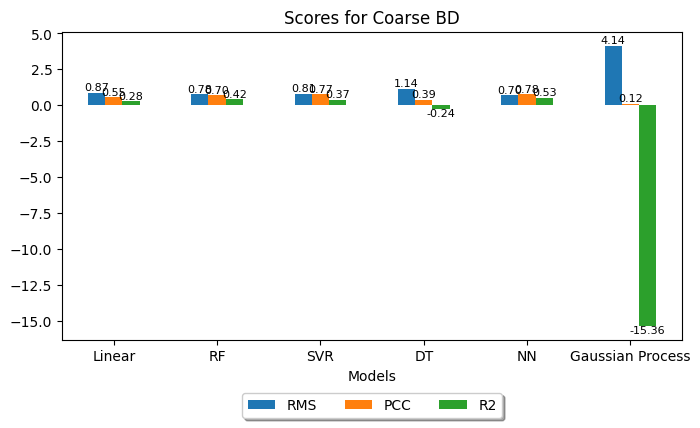

In [17]:
ehm_utils.scores_graph(EHMs_bd_coarse, plot_title = 'Scores for Coarse BD')

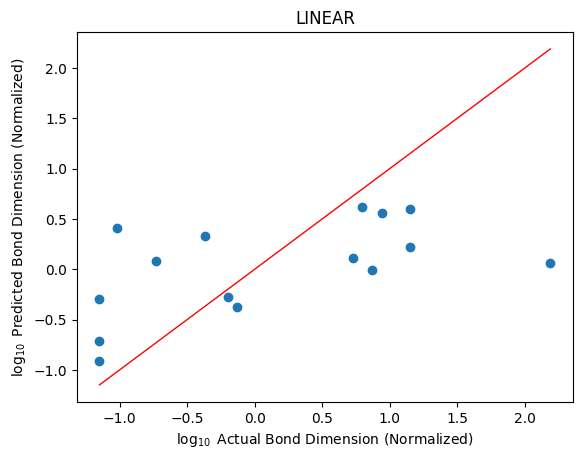

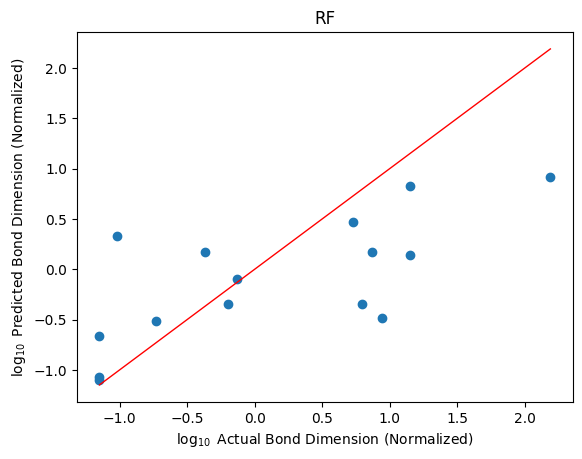

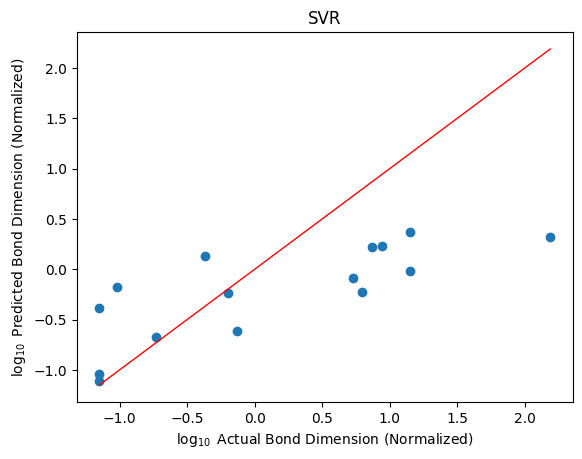

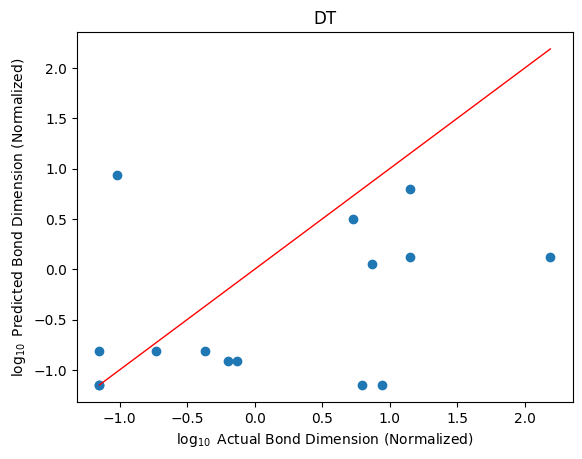

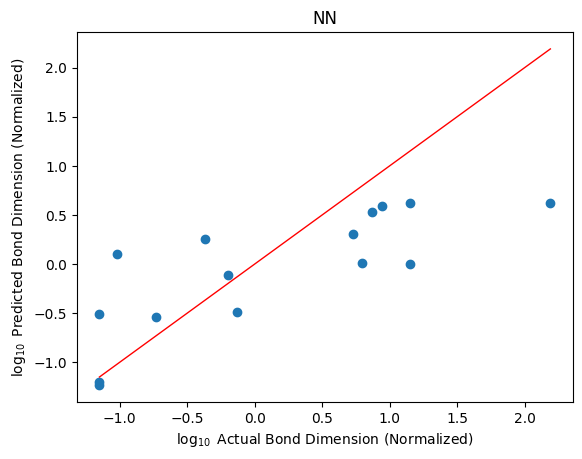

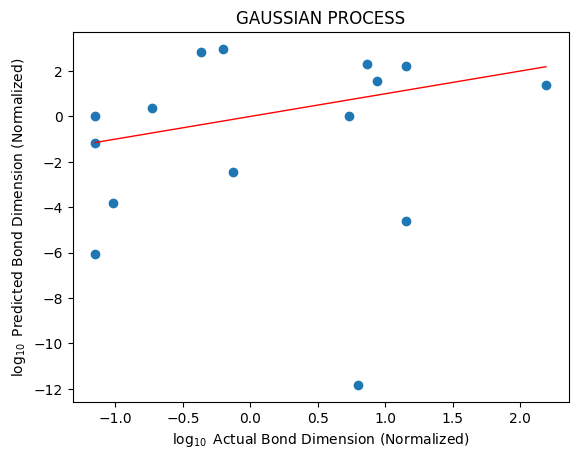

In [26]:
actual_axis_label = r'$\log_{10}$ Actual Bond Dimension (Normalized)'
predicted_axis_label = r'$\log_{10}$ Predicted Bond Dimension (Normalized)'


ehm_utils.plot_predicted_vs_actual(EHMs_bd_coarse, y_test, actual_axis_label, predicted_axis_label)

log10_hilbert_space_size       0.435238
exchange_matrix_specA_min      0.317607
mean_field_matrix_specL_max    0.247156
dtype: float64


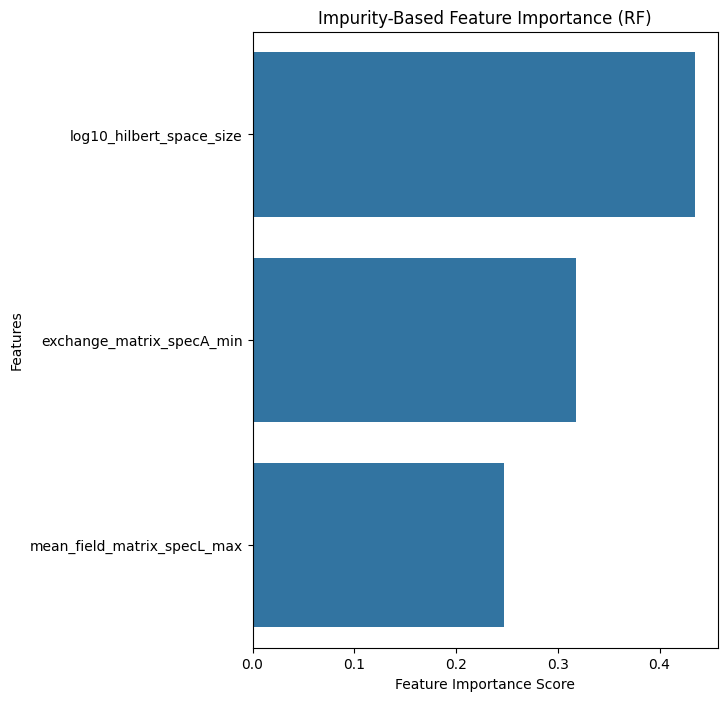

mean_field_matrix_specL_max    0.344638
log10_hilbert_space_size       0.343730
exchange_matrix_specA_min      0.311632
dtype: float64


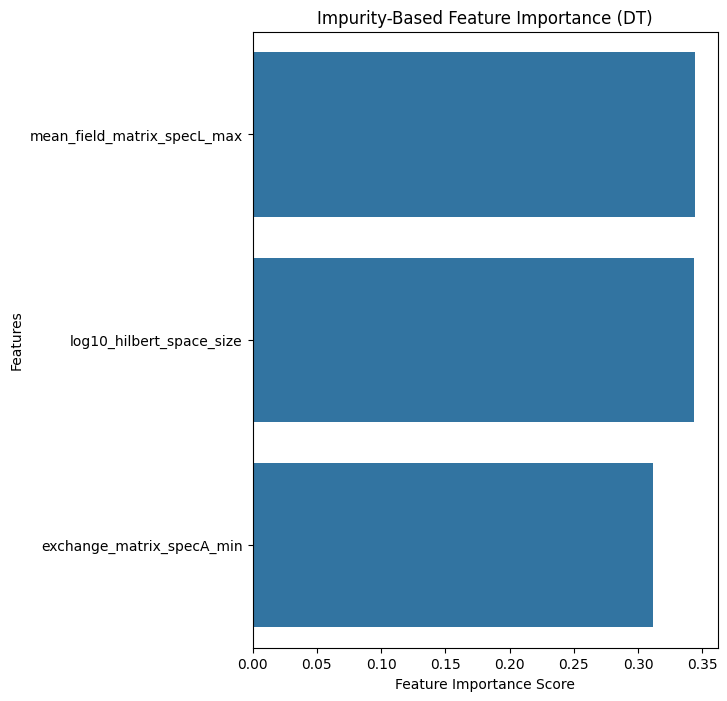

0.3561084270477295

In [19]:
start = time.time()
pd.set_option('display.max_rows', None)
ehm_utils.feature_importance_impurity(EHMs_bd_coarse,features)

feature_importance_impurity_Conc_time = time.time() - start
feature_importance_impurity_Conc_time

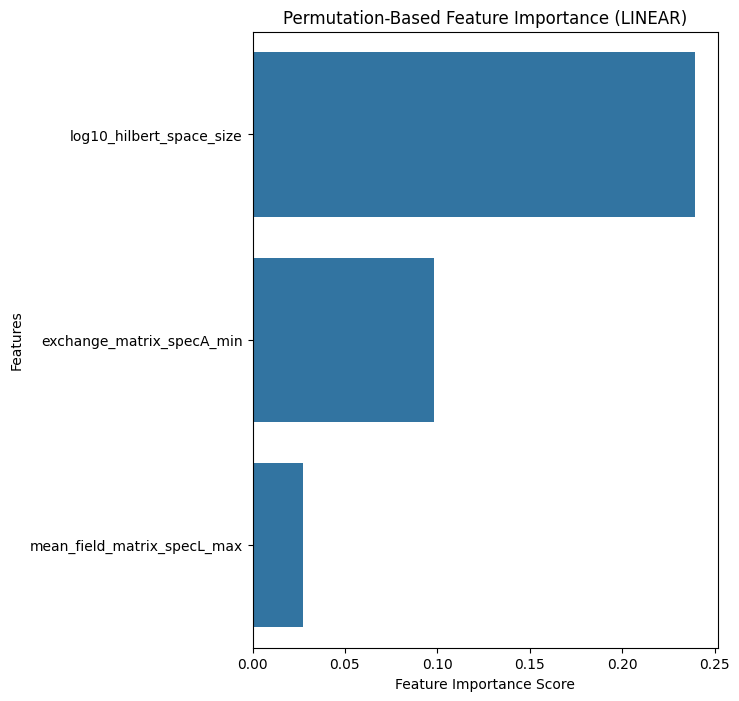

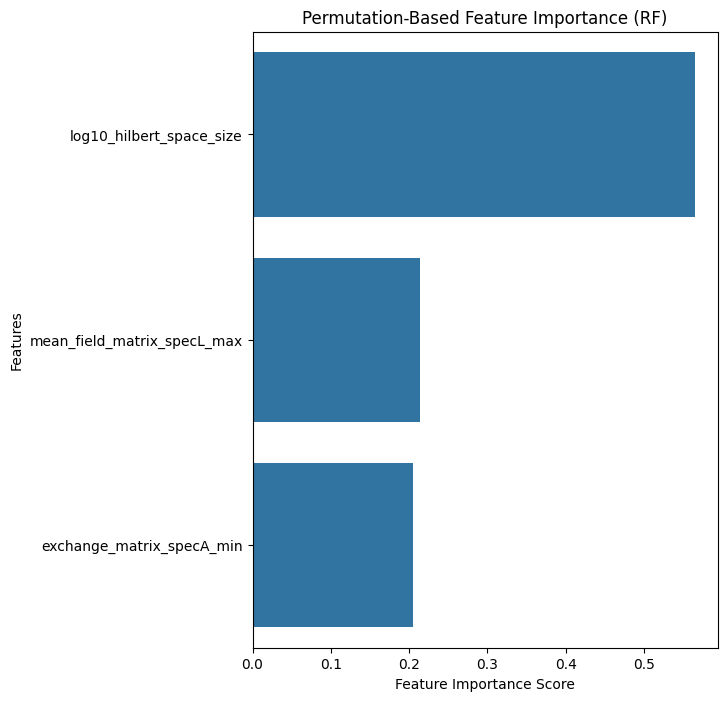

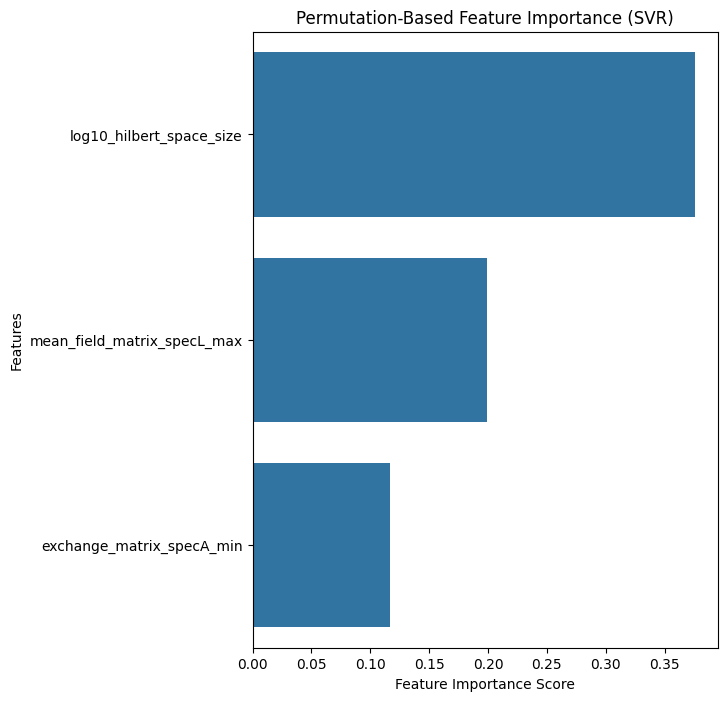

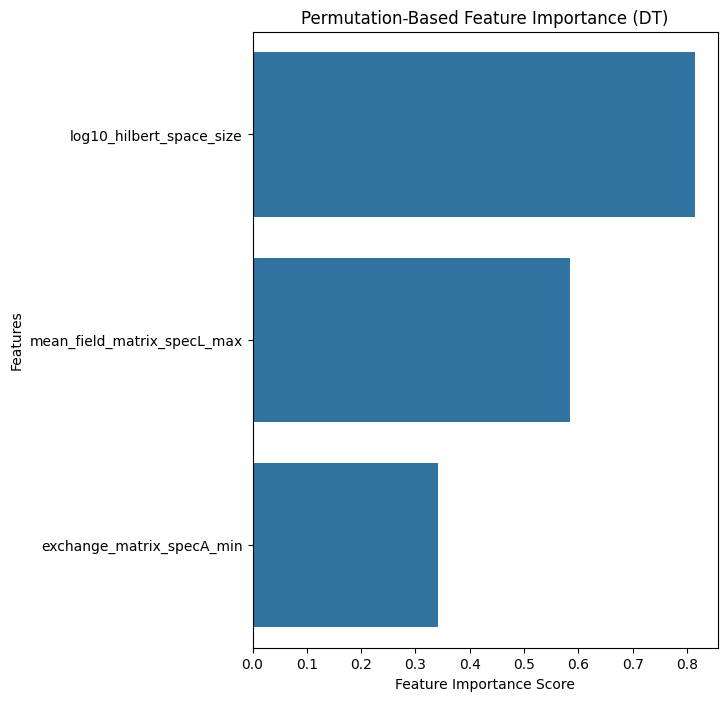

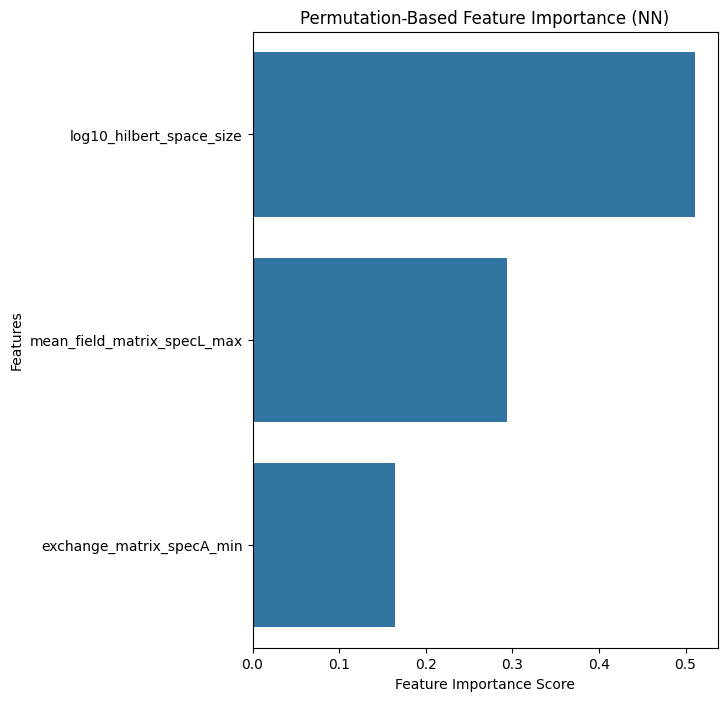

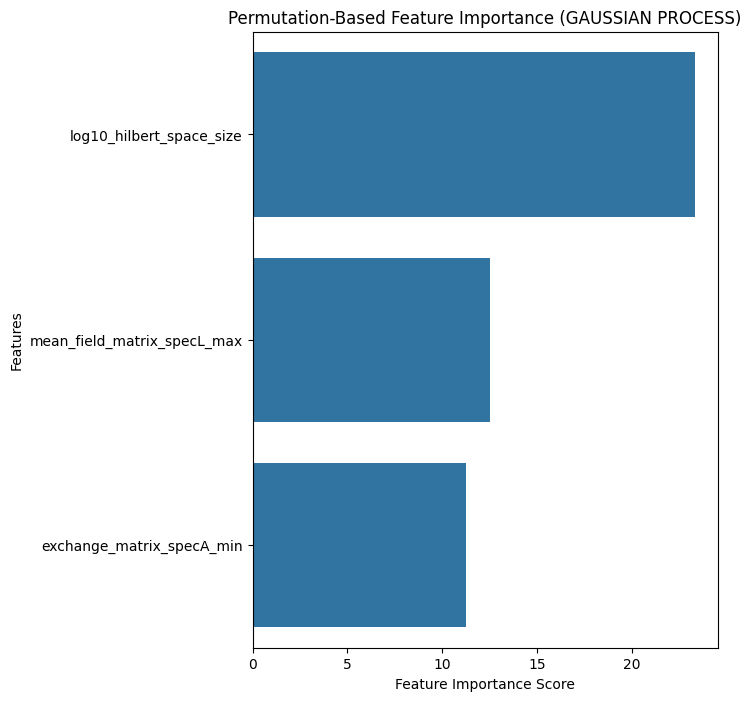

1.1136791706085205

In [20]:
start = time.time()

ehm_utils.feature_importance_permutation(EHMs_bd_coarse,features, X, y)

feature_importance_permutation_Conc_time = time.time() - start
feature_importance_permutation_Conc_time

In [21]:
# preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coarse_bond_dimension', kind='scatter')
# plt.xlabel('log10 Hilbert Space Size (Normalized)')
# plt.ylabel('Coarse Bond Dimension Estimate')
# preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_algebraic_connectivity', y='coarse_bond_dimension', kind='scatter')
# plt.xlabel('Algebraic Connectivity of Orbital Coupling Graph (Normalized)')
# plt.ylabel('Coarse Bond Dimension Estimate')
# preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specA_mean', y='coarse_bond_dimension', kind='scatter')
# preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coulomb_matrix_algebraic_connectivity', kind='scatter')
# preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='tbt_abs_graph_mapping_algebraic_connectivity', kind='scatter')

# # Pos
# # log10_hilbert_space_size
# # num_orbitals
# # coulomb_matrix_bandwidth_upper
# # coulomb_matrix_algebraic_connectivity
# # coulomb_matrix_edgeCount
# # coulomb_matrix_specA_max
# # coulomb_matrix_specA_power_spectral_entropy
# # coulomb_matrix_specR_power_spectral_entropy
# # exchange_matrix_specA_power_spectral_entropy
# # exchange_matrix_specR_min
# # exchange_matrix_specR_power_spectral_entropy
# # mean_field_calc_time_s
# # mean_field_matrix_algebraic_connectivity
# # mean_field_matrix_algebraic_connectivity_calc_time_s
# # mean_field_matrix_specA_max
# # mean_field_matrix_specA_power_spectral_entropy
# # mean_field_matrix_specL_std
# # mean_field_matrix_specR_power_spectral_entropy
# # tbt_graph_mapping_calc_time_s
# # tbt_abs_graph_mapping_calc_time_s
# # tbt_abs_graph_mapping_algebraic_connectivity ***
# # tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s
# # tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s
# # tbt_abs_graph_mapping_specA_min
# # tbt_abs_graph_mapping_specA_Q2
# # tbt_abs_graph_mapping_specA_max
# # tbt_abs_graph_mapping_specA_mean **
# # tbt_abs_graph_mapping_specA_std
# # tbt_abs_graph_mapping_specA_coeff_variation
# # tbt_abs_graph_mapping_specA_power_spectral_entropy
# # tbt_abs_graph_mapping_specL_max
# # tbt_abs_graph_mapping_specL_std
# # tbt_abs_graph_mapping_specR_power_spectral_entropy
# # density_hopping_tensor_min
# # density_hopping_tensor_sum_abs

# #Neg
# # coulomb_matrix_specL_min
# # coulomb_matrix_specL_Q2
# # coulomb_matrix_specL_mean
# # coulomb_matrix_specR_min
# # exchange_matrix_specL_coeff_variation
# # exchange_matrix_specL_power_spectral_entropy
# # exchange_matrix_specR_max
# # exchange_matrix_specR_std
# # mean_field_matrix_specA_min
# # mean_field_matrix_specL_min
# # mean_field_matrix_specL_Q2
# # mean_field_matrix_specL_mean
# # mean_field_matrix_specR_min
# # tbt_abs_graph_mapping_specL_coeff_variation
# # tbt_abs_graph_mapping_specL_power_spectral_entropy
# # tbt_abs_graph_mapping_specR_max
# # tbt_abs_graph_mapping_specR_coeff_variation
# # density_hopping_tensor_coeff_variation
# # tbt_coeff_variation




In [22]:
# preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coarse_bond_dimension', kind='scatter')
# preproc_df_coarse_bd.plot(x='two_S', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='exchange_matrix_specA_power_spectral_entropy', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specA_std', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specA_power_spectral_entropy', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specL_std', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='density_hopping_tensor_min', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='exchange_matrix_specL_coeff_variation', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='exchange_matrix_specL_power_spectral_entropy', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specR_max', y='coarse_bond_dimension', kind='scatter')
# # preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specR_coeff_variation', y='coarse_bond_dimension', kind='scatter')


In [23]:
# Calc the pearson correlation coefficient between pairs of features

corr_mat_df = mlData.corr()
corr_mat_df

,log10_hilbert_space_size,exchange_matrix_specA_min,mean_field_matrix_specL_max,coarse_bond_dimension
log10_hilbert_space_size,1.000000,0.539311,0.012500,0.487957
exchange_matrix_specA_min,0.539311,1.000000,-0.042133,0.425554
mean_field_matrix_specL_max,0.012500,-0.042133,1.000000,0.006620
coarse_bond_dimension,0.487957,0.425554,0.006620,1.000000


In [24]:

np.abs(corr_mat_df["coarse_bond_dimension"]).sort_values(ascending=False)

coarse_bond_dimension          1.000000
log10_hilbert_space_size       0.487957
exchange_matrix_specA_min      0.425554
mean_field_matrix_specL_max    0.006620
Name: coarse_bond_dimension, dtype: float64

In [25]:
np.abs(corr_mat_df["hubbard_dist_tbt"]).sort_values(ascending=False)

KeyError: 'hubbard_dist_tbt'

In [ ]:
np.abs(corr_mat_df["density_hopping_tensor_coeff_variation"]).sort_values(ascending=False)

In [ ]:
corr_mat_df[np.abs(corr_mat_df)>0.8]["log10_hilbert_space_size"]

In [ ]:
# corr_mat_df["log10_hilbert_space_size"].loc[np.abs(corr_mat_df["log10_hilbert_space_size"]) > 0.8]

In [ ]:
# corr_mat_df["coulomb_matrix_algebraic_connectivity"].loc[np.abs(corr_mat_df["coulomb_matrix_algebraic_connectivity"]) > 0.8]

In [ ]:
# corr_mat_df["tbt_abs_graph_mapping_algebraic_connectivity"].loc[np.abs(corr_mat_df["tbt_abs_graph_mapping_algebraic_connectivity"]) > 0.8]

In [ ]:

np.abs(corr_mat_df["coulomb_matrix_specR_min"]).sort_values(ascending=False)

In [ ]:

np.abs(corr_mat_df["coarse_bond_dimension"]).sort_values(ascending=False)
# np.abs(corr_mat_df["coarse_bond_dimension"].loc[np.abs(corr_mat_df["coarse_bond_dimension"]) > 0.3]).sort_values(ascending=False)

In [ ]:
# Calc the pearson correlation coefficient between pairs of features
corr_mat_df_scc = mlData.corr(method='spearman')
# corr_mat_df_scc
np.abs(corr_mat_df_scc["coarse_bond_dimension"]).sort_values(ascending=False)

In [ ]:
np.abs(corr_mat_df_scc["coarse_bond_dimension"])

In [ ]:
prod_df= np.abs(corr_mat_df["coarse_bond_dimension"])/np.abs(corr_mat_df)
prod_df/=np.max(prod_df)
prod_df=np.log10(prod_df)
prod_df[(prod_df)>-2].count()
# prod_df[np.logical_and((prod_df)>0.3,(prod_df)<0.4)].count()